**Music and Lyrics by:** *Όνομα και ΑΜ*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 2**
Σε αυτό το θέμα θα κατασκευάσετε μια οντολογία η οποία θα περιγράφει το πεδίο των μουσικών κομματιών, και θα είναι συμβατή με το γράφο γνώσης που κατασκευάσατε στο πρώτο θέμα.

## 1ο Μέρος: Συντακτικά Ορθή Οντολογία


Σε αυτό το μέρος θα μετατρέψετε το γράφο γνώσης που δημιουργήσατε στο πρώτο θέμα, σε συντακτικά ορθή οντολογία. Όποιος επιθυμεί (κυρίως για άτομα που δεν έχουν ολοκληρώσει το πρώτο θέμα) μπορεί να εργαστεί με το γράφο γνώσης που σας δίνεται στο αρχείο ```songs.nt```.
<!-- Όποιος χρησιμοποιήσει τη δική του γνώση (που δημιούργησε στο πρώτο θέμα) κι **ΌΧΙ** το movies.nt θα έχει bonus της τάξεως του 20%.  -->

Θα εργαστούμε με τη βιβλιοθήκη [owlready2](https://owlready2.readthedocs.io/en/latest/) η οποία δίνει πρόσβαση σε τεχνολογίες αναπαράστασης γνώσης και οντολογιών (π.χ. OWL) μέσω της Python.


In [ ]:
!pip install owlready2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.1 Μετατροπή σε owl
Αν και η μορφή (format) του αρχείου είναι συμβατή με το πρότυπο OWL **δεν είναι μια σημασιολογικά ορθή οντολογία**, είναι απλά ένα σύνολο από δεδομένα σε μια μορφή που είναι συμβατή με το πρότυπο OWL. Μια οντολογία ορίζει ένα σύνολο από κανόνες που διέπουν έναν κόσμο, **δεν** είναι απλά μια αναπαράσταση των δεδομένων όπως είναι ένας γράφος γνώσης (αν και τα περισσότερα αξιώματα της οντολογίας μπορούν να αναπαρασταθούν με γράφους γνώσης).

Τα βασικά συστατικά μέρη μιας οντολογίας είναι οι ατομικές έννοιες -τις οποίες συναντάμε στην OWL ως κλάσεις-(concepts-CN), οι ατομικοί ρόλοι -τους οποίους συναντάμε στην OWL ως ιδιότητες αντικειμένου και ιδιότητες τύπου δεδομένων- (roles-RN) και τα άτομα (individuals-IN). Με βάση αυτά κατασκευάζονται εκφράσεις σύνθετων εννοιών  και ρόλων, και αξιώματα (axioms).

Στην παρούσα φάση δεν έχουμε αξιώματα και τόσο το σύνολο CN όσο και το RN είναι κενά. Πρακτικά έχουμε μόνο πληροφορία που αφορά τους individuals (τα άτομα του κόσμου μας) η οποία προέρχεται από το γράφο γνώσης μας. Δεν έχουμε λοιπόν καμία πληροφορία για τους κανόνες που διέπουν τον κόσμο, τις έννοιες από τις οποίες αποτελείται ο κόσμος μας όπως και τις πιθανές σχέσεις μεταξύ αυτών των εννοιών. Αυτή την πληροφορία καλείστε να συμπληρώσετε στη συνέχεια της άσκησης.

Στην οντολογία μας λοιπόν θα πρέπει να ορίσουμε αρχικά έννοιες:
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Concept"/>

#N-triples
<http://example.org/ns/Concept> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> 
```
καθώς και ρόλους:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/role"/>

#N-triples
<http://example.org/props/role> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> 
```



#### 1.1.1 Αρχικοποίηση του CN

Σε πρώτη φάση πρέπει να ορίσετε τις απαραίτητες έννοιες για να αναπαρασταθούν σωστά τα δεδομένα σας, δηλαδή κάθε άτομο του κόσμου σας να έχει έναν τύπο ο οποίος θα είναι κάποια έννοια. Για παράδειγμα στα δεδομένα σας έχετε σίγουρα μουσικά κομμάτια και συνθέτες. Για να αναπαρασταθούν σωστά αυτά τα άτομα είναι απαραίτητες οι έννοιες "Song" και "Composer" αντίστοιχα. Φυσικά μπορείτε να δώσετε ό,τι ονόματα επιθυμείτε εσείς στις έννοιες, όμως θα συνιστούσαμε να κρατήσετε το ίδιο μοτίβο σε όλη την άσκηση, και να δώσετε χαρακτηριστικά αλλά και συνοπτικά ονόματα τόσο στις έννοιες όσο και στους ρόλους. Για αρχή θα ορίσουμε όλες τις έννοιες να είναι υποέννοιες (subClassOf) του Thing, και σε επόμενο ερώτημα θα προχωρήσουμε στη δημιουργία πιο σύνθετων ιεραρχιών. 

Πρώτα όμως πρέπει να αρχικοποιήσουμε μια οντολογία φορτώνοντας το γράφο γνώσης στο owlready2 με την εντολή
```python
onto=get_ontology('file://path/to/knowledge/graph').load()
```
Θα ορίσουμε τους ονοματοχώρους που χρησιμοποιεί, στη συγκεκριμένη περίπτωση  "prop" για τους ρόλους (που αντιστοιχούν στις ιδιότητες του γράφου- properties) και "ns" για τις έννοιες.
```python
prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')
```

Ο ορισμός των εννοιών Song και Composer κάτω από το Thing, χρησιμοποιώντας τον ονοματοχώρο ```http://example.org/ns/``` στην owlready2 γίνεται ως εξής:
```python
with onto:
  with ns:
    class Song(Thing):
      pass
    class Composer(Thing):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία, θα παρατηρήσουμε πως έχουν προστεθεί τριάδες της μορφής
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Composer">
  <rdfs:subClassOf rdf:resource="http://www.w3.org/2002/07/owl#Thing"/>
</owl:Class>

#N-triples
<http://myontology.org#Composer> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> .
<http://myontology.org#Composer> <http://www.w3.org/2000/01/rdf-schema#subClassOf> <http://www.w3.org/2002/07/owl#Thing> .
```
Δηλαδή έχει οριστεί η έννοια Composer ως owl:Class η οποία είναι υποέννοια (rdfs:subClassOf) του owl:Thing.

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε το σύνολο ονομάτων εννοιών - CN.

*Σημείωση: δεν είναι απαραίτητο να ορίσετε ρητά ποια individual είναι τύπου Song, Composer, κλπ. μιας και αυτό μπορεί να το συμπεράνει ο reasoner (θα δούμε τι είναι αυτό στο μάθημα και στο επόμενο θέμα) εάν ορίσετε τα κατάλληλα πεδία τιμών και πεδία ορισμού που θα δείτε στο δεύτερο (2ο) μέρος.* 

Μπορείτε να "σώσετε" μια οντολογία με την owlready2 όπως φαίνεται παρακάτω, σε μορφή RDF/XML και N-triples αντίστοιχα. Η μορφή RDF/XML είναι η default επιλογή.

```python
with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  # or just: onto.save('myOnto.owl')

  #N-triples
  onto.save('myOnto.nt',format='ntriples')

```

In [ ]:
# Απάντηση 1.1.1
from owlready2 import *

#################
onto=get_ontology('./songs.nt').load()

prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')


with onto:
  with ns:
    class Song(Thing):
      pass
    class Composer(Thing):
      pass
    class Genre(Thing):
      pass
    class Emotion(Thing):
      pass
    class Instrument(Thing):
      pass
    class Publisher(Thing):
      pass
    class Place(Thing):
      pass


# with onto:
#   #RDF/XML
#   onto.save('myOnto.owl',format='rdfxml')
#   # or just: onto.save('myOnto.owl')

#   #N-triples
#   onto.save('myOnto.nt',format='ntriples')
# #################

#### 1.1.2 Αρχικοποίηση του RN

Σειρά έχει η αρχικοποίηση του RN. Πρακτικά θέλουμε να δημιουργήσετε έναν ρόλο για κάθε ιδιότητα (property) του γράφου γνώσης σας. Αυτό μπορείτε να το επιτύχετε ορίζοντας πως κάθε ακμή του γράφου γνώσης είναι ένα ```owl:ObjectProperty``` αν συνδέει individuals μεταξύ τους ή ένα ```owl:DataProperty``` αν συνδέει individuals με τύπους δεδομένων.  

Προσοχή: οι ρόλοι **ΔΕΝ** συνδέουν individuals με έννοιες, αυτό γίνεται μέσω της σχέσης rdfs:type. Θα πρέπει λοιπόν να έχετε κατά νου πως δεν πρέπει να δημιουργήσετε ρόλους που συνδέουν individuals με έννοιες, το οποίο είναι πολύ πιθανό να συμβεί σε περίπτωση που στο γράφο γνώσης σας έχετε κάποια σχέση της μορφής "is_a". 

Για να ορίσουμε τους απαραίτητους ρόλους, πρώτα βρίσκουμε το σύνολο ονομάτων ακμών στο γράφο γνώσης, δηλαδή το σύνολο των URIs τα οποία εμφανίζονται στη μεσαία θέση μιας τριάδας. Έστω πως το σύνολο αυτό περιέχει τα εξής URIs:
```
<http://example.org/props/hasGenre>
<http://example.org/props/hasDateOfBirth>
```

Θέλουμε να ορίσουμε λοιπόν πως το URI ```<http://example.org/props/hasGenre>``` είναι owl:ObjectProperty ενώ το ```<http://example.org/props/hasDateOfBirth>``` είναι owl:DataProperty. Στην owlready2 αυτό γίνεται ως εξής:
```python
with onto:
  with prop:
    class hasGenre(ObjectProperty):
      pass
    class hasDateOfBirth(DataProperty):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία σε ένα αρχείο
```python
with onto:
  #RDF/XML
  onto.save('myonto.owl')

  #N-triples
  onto.save('myonto.nt',format='ntriples')
```
και ανοίξουμε το αρχείο θα δούμε να έχουν προστεθεί τα ακόλουθα:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/hasGenre"/>
<owl:DatatypeProperty rdf:about="http://example.org/props/hasDateOfBirth"/>


#N-triples
<http://example.org/props/hasGenre> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> .
<http://example.org/props/hasDateOfBirth> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#DatatypeProperty> .
```
Δηλαδή προσθέσαμε τα ονόματα δύο ρόλων στην οντολογία μας, η οποία αρχίζει να παίρνει μορφή. 

Για ακόμη συνεπέστερη αρχικοποίηση ρόλων μπορείτε να ορίσετε το domain (πεδίο ορισμού) και το range (πεδίο τιμών) του κάθε property. Επίσης, αν ο ρόλος είναι μονοσήμαντος, τότε πρέπει να οριστεί ως functional property. Για παράδειγμα, γνωρίζουμε ότι η ιδιότητα hasDateOfBirth είναι μονοσήμαντη και συνδέει συνθέτες με την ημερομηνία γέννησής τους, σε μορφή datetime. Μια πλήρης αρχικοποίηση αυτής της ιδιότητας είναι η εξής:

```python
from datetime import datetime
with onto:
  with prop:
    class hasDateOfBirth(DataProperty, FunctionalProperty): 
            domain   = [Composer]
            range     = [datetime]
            pass
```

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε την οντολογία σας και να ορίσετε το σύνολο ονομάτων ρόλων - RN.

*Προσοχή: σε αυτό το βήμα να χρησιμοποιήσετε για ονόματα ρόλων τα ίδια ακριβώς ονόματα που υπάρχουν στις ιδιότητες του γράφου γνώσης σας ώστε να μην χρειάζετε να κάνετε αλλαγές στη συνέχεια. Εάν ορίσετε διαφορετικό όνομα (π.χ. ορίσετε το ρόλο "genres" για την ιδιότητα "hasGenres" που υπάρχει στο γράφο γνώσης) τότε θα πρέπει στη συνέχεια να αλλάξετε την πληροφορία που έχετε για όλα τα άτομα του κόσμου σας, ενώ εάν χρησιμοποιήσετε το ίδιο όνομα (και ίδιο ονοματόχωρο όπως έχουμε ορίσει παραπάνω) αυτό δεν θα χρειαστεί διότι θα είναι συμβατή η ονομασία με την ήδη υπάρχουσα πληροφορία (π.χ. η "τριάδα RDF" ```<http://example.org/ns/446_LO11344164> <http://example.org/props/hasGenre> <http://example.org/ns/Pop>``` που μπορεί να υπάρχει ήδη στην οντολογία μας από το γράφο γνώσης θα δείχνει τη σύνδεση με το ρόλο "hasGenre" μεταξύ του μουσικού κομματιού με europeanaID "446_LO11344164" και της Pop ενώ εάν ο αντίστοιχος ρόλος έχει ονομαστεί διαφορετικά τότε αυτή η τριάδα δεν θα αντιστοιχεί σε κανένα ρόλο της οντολογίας μας και θα πρέπει να την αλλάξουμε).*

In [ ]:
### Απάντηση 1.1.2

#################


from datetime import datetime
with onto:
  with prop:
    class hasGenre(ObjectProperty):
      pass
    class hasEmotion(ObjectProperty):
      pass
    class hasInstrument(ObjectProperty):
      pass
    class hasComposer(ObjectProperty, FunctionalProperty):
      domain = [Song]
      range = [Composer]
      pass
    class hasPublisher(ObjectProperty, FunctionalProperty):
      domain = [Song]
      range = [Publisher]
      pass
    class hasPlace(ObjectProperty, FunctionalProperty):
      domain = [Song]
      range = [Place]
      pass
    class hasDateOfBirth(DataProperty, FunctionalProperty):
      domain = [Composer]
      range = [datetime]
      pass
    class hasDateOfDeath(DataProperty, FunctionalProperty):
      domain = [Composer]
      range = [datetime]
      pass
    class hasDuration(DataProperty, FunctionalProperty):
      domain = [Song]
      range = [int]
      pass
    class hasYear(DataProperty, FunctionalProperty):
      domain = [Song]
      range = [datetime]
      pass
    class hasTitle(DataProperty, FunctionalProperty):
      domain = [Song]
      range = [str]
      pass
    class hasBiography(DataProperty):
      domain = [Composer]
      range = [str]
      pass
    
    
#################

In [ ]:
with onto:
  onto.save('myonto2.owl')

#### 1.1.3 Σημασιολογικά Ορθή Οντολογία

Πλέον έχουμε μετατρέψει το γράφο γνώσης μας σε μια συντακτικά ορθή οντολογία. Αυτό δεν σημαίνει όμως πως είναι και σημασιολογικά ορθή και συνεπής.

Αυτή τη στιγμή έχετε αντιστοιχίσει συντακτικά το γράφο γνώσης του πρώτου θέματος σε μια οντολογία. Προσθέσατε τις κατάλληλες έννοιες (π.χ. Song, Genre, κλπ) και αντιστοιχίσατε τις ιδιότητες (properties) στους κατάλληλους ρόλους. Όμως η μοντελοποίηση αυτής της οντολογίας μπορεί να μην είναι σωστή ή/και συνεπής, διότι η οντολογία, όπως έχουμε αναφέρει και παραπάνω, δεν είναι απλώς ένας διαφορετικός τρόπος να αναπαραστήσει κανείς ένα γράφο γνώσης. Μία οντολογία μοντελοποιεί έναν κόσμο (όπου συνήθως βασίζεται στον πραγματικό κόσμο), διέπεται από σαφείς κανόνες, και απαιτεί ορισμένες σχεδιαστικές επιλογές από το δημιουργό της. 

Σε αυτό το ζητούμενο καλείστε να μελετήσετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής και να αναθεωρήσετε/αλλάξετε ορισμένα κομμάτια της μοντελοποίησης ώστε να είναι πιο ορθή / να ανταποκρίνεται καλύτερα στην πραγματικότητα.  
Για παράδειγμα πιθανότατα στην οντολογία που έχετε δημιουργήσει, ένα μουσικό κομμάτι (ένας individual που έχει type Song) συνδέεται με έναν ρόλο της μορφής hasGenre με έναν άλλο individual που είναι τύπου Genre και αντιστοιχεί στη rock (ή οποιοδήποτε άλλο genre). Αυτή, αν και τυπικά δεν είναι λαθος μοντελοποιηση, δεν μπορεί να θεωρηθεί ούτε απόλυτα σωστή, μιας και η rock δεν είναι άτομο του κόσμου μας, είναι μια έννοια/ένας όρος με τον οποίο χαρακτηρίζονται έργα με ορισμένα (ίσως κι αφηρημένα) χαρακτηριστικά. 

Θα μπορούσε κάποιος να σκεφτεί να ορίσει την έννοια Genre, και όλα τα είδη ως υποέννοιες της Genre. Στη συνέχεια να προσθέσει την πληροφορία πως κάθε μουσικό κομμάτι (individual με type Song) μπορεί να είναι και τύπου Rock το οποίο θα είναι υποέννοια του Genre όπως αναφέραμε. Αυτή η μοντελοποίηση είναι όμως **ΛΑΘΟΣ**, αφού αν οριστεί ένα μουσικό κομμάτι ως άτομο τύπου Rock, τότε αφού η Rock είναι υποέννοια του Genre, προκύπτει σημασιολογικά πως το μουσικό κομμάτι αυτό είναι άτομο τύπου Genre, το οποίο είναι λάθος.

Άρα στην περίπτωσή μας όπου δημιουργούμε μια οντολογία για μουσικά κομμάτια πιο ορθή φαντάζει μια μοντελοποίηση της πληροφορίας πως κάποιο μουσικό κομμάτι είναι Rock ως μίας έννοιας RockSong (ή και απλά Rock) όπου είναι υποέννοια (subClassOf) της έννοιας Song. 

Καλείστε λοιπόν να εντοπίσετε και να διορθώσετε αντίστοιχα λάθη μοντελοποίησης της οντολογίας σας. Αφαιρέστε τη "λανθασμένη" πληροφορία και αντικαταστήστε τη με την "ορθή". Στο παραπάνω παράδειγμα με την Rock μια τέτοια αντικατάσταση θα μπορούσε να γίνει δημιουργώντας τις κατάλληλες έννοιες (RockSong, PopSong, κλπ), ορίζοντας το κατάλληλο type στους αντίστοιχους individuals και αφαιρώντας τους ρόλους hasGenre καθώς και όλους τους individuals που αντιστοιχούσαν σε κάποιο Genre.
Αναφέρετε συνοπτικά τις αλλαγές που κάνατε και σχολιάστε τις. 

<!-- Παρακάτω δίνεται ενδεικτικό κομμάτι κώδικα για να επιτελέσετε τα παραπάνω.  -->

Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία σας σε ένα αρχείο KR-Ex2_1.owl όπως δείξαμε παραπάνω, το οποίο θα παραδοθεί μαζί με τα υπόλοιπα αρχεία στο τέλος της άσκησης. 

In [ ]:
# Απάντηση 1.1.3

#################
with onto:
  with ns:
    Rock = Genre("Rock")
    class RockSong(Song):
      equivalent_to = [Song & hasGenre.value(Rock)]
      pass
    Country = Genre("Country")
    class CountrySong(Song):
      equivalent_to = [Song & hasGenre.value(Country)]
      pass
    Instrumental = Genre("Instrumental")
    class InstrumentalSong(Song):
      equivalent_to = [Song & hasGenre.value(Instrumental)]
      pass
    Opera = Genre("Opera")
    class OperaSong(Song):
      equivalent_to = [Song & hasGenre.value(Opera)]
      pass
    Classical = Genre("Classical")
    class ClassicalSong(Song):
      equivalent_to = [Song & hasGenre.value(Classical)]
      pass
    Pop = Genre("Pop")
    class PopSong(Song):
      equivalent_to = [Song & hasGenre.value(Pop)]
      pass
    TraditionalFolk = Genre("TradionalFolk")
    class TraditionalFolkSong(Song):
      equivalent_to = [Song & hasGenre.value(TraditionalFolk)]
      pass
    Reggae = Genre("Reggae")
    class ReggaeSong(Song):
      equivalent_to = [Song & hasGenre.value(Reggae)]
      pass
    Hip_Hop = Genre("Hip_Hop")
    class Hip_HopSong(Song):
      equivalent_to = [Song & hasGenre.value(Hip_Hop)]
      pass
    Jazz = Genre("Jazz")
    class JazzSong(Song):
      equivalent_to = [Song & hasGenre.value(Jazz)]
      pass
    Funk = Genre("Funk")
    class FunkSong(Song):
      equivalent_to = [Song & hasGenre.value(Funk)]
      pass
    Joy = Emotion("Joy")
    class JoySong(Song):
      equivalent_to = [Song & hasEmotion.value(Joy)]
      pass
    Calmness = Emotion("Calmness")
    class CalmnessSong(Song):
      equivalent_to = [Song & hasEmotion.value(Calmness)]
      pass
    Arousal = Emotion("Arousal")
    class ArousalSong(Song):
      equivalent_to = [Song & hasEmotion.value(Arousal)]
      pass
    Pleasure = Emotion("Pleasure")
    class PleasureSong(Song):
      equivalent_to = [Song & hasEmotion.value(Pleasure)]
      pass
    Anxiety = Emotion("Anxiety")
    class AnxietySong(Song):
      equivalent_to = [Song & hasEmotion.value(Anxiety)]
      pass
    Sadness = Emotion("Sadness")
    class SadnessSong(Song):
      equivalent_to = [Song & hasEmotion.value(Sadness)]
      pass
    Boredom = Emotion("Boredom")
    class BoredomSong(Song):
      equivalent_to = [Song & hasEmotion.value(Boredom)]
      pass
    Fear = Emotion("Fear")
    class FearSong(Song):
      equivalent_to = [Song & hasEmotion.value(Fear)]
      pass

with onto:
  onto.save('KR-Ex2_1.owl')



```
# This is formatted as code
```

##2ο Μέρος: Σημασιολογικά Συνεπής Οντολογία και Εμπλουτισμός

 Στο δεύτερο (2ο) μέρος της άσκησης θα εργαστείτε στο [Protégé](https://protege.stanford.edu/). Θα εξαγάγετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής (μόνο τα CN και RN, όχι τους individuals) σε ένα αρχείο το οποίο θα επεξεργαστείτε με τη βοήθεια του Protégé για να εργαστείτε με τα επόμενα ζητούμενα. Προσέξτε για τη συνέχεια να μη σβήσετε καμία πληροφορία από την οντολογία (μόνο να προσθεσετε) διότι τότε μπορεί να σταματήσει να είναι συνεπής με τα δεδομένα που έχουμε, θεωρητικά δεν θα χρειαστεί να σβήσετε τίποτα διότι έχετε κάνει τις όποιες διορθώσεις έχουν χρειαστεί στα προηγούμενα ερωτήματα. 


Πριν φορτώσουμε την οντολογία στο [Protégé](https://protege.stanford.edu/), θα τρέξουμε τον reasoner μέσω του owlready2. Αυτό από τη μία θα μας δείξει αν η οντολογία που έχουμε φτιάξει ως τώρα είναι συνεπής, ενώ από την άλλη θα συμπεράνει ποια ονόματα αντιστοιχούν σε άτομα του κόσμου. Αυτά τα άτομα δεν μας αφορούν όταν θα δουλεύουμε την οντολογία στο protege οπότε θα τα σβήσουμε.

In [ ]:
del onto
onto = get_ontology('file:///content/KR-Ex2_1.owl').load()

In [ ]:
with onto:
  # sync_reasoner()
  for i in onto.individuals():
    destroy_entity(i)

  ## Επειδή κάποια δεν τα ορίσαμε ως named individuals
  ## αλλά κατάλαβε ο reasoner πως είναι τύπου owl:Thing
  ## Πρέπει να τα σβήσουμε ξεχωριστά
  instances = onto.get_instances_of(Thing)
  for i in instances:
    destroy_entity(i)
  onto.save('myonto-protege1.owl')


### 2.1 Σημασιολογικά Συνεπής Οντολογία
Σε αυτό το ζητούμενο καλείστε να βάλετε περιορισμούς στον κόσμο σας ώστε να έχουμε μια οντολογία συνεπή με την πραγματικότητα. Πρέπει να δημιουργήσετε πεδία ορισμού (Π.Ο.) και πεδία τιμών (Π.Τ.) για τους ρόλους της οντολογίας σας, καθώς και να ορίσετε ξένες (disjoint) έννοιες και ρόλους (π.χ. δεν μπορεί ένας individual του κόσμου μας να είναι και μουσικό κομμάτι και είδος ταυτόχρονα). 


Περιγράψτε τους περιορισμούς που ορίσατε στο markdown που ακολουθεί


*Τα πεδία ορισμού και τα πεδία τιμών μπορούν να δημιουργηθούν και μέσω της owlready2 όπως έχουμε δείξει.*

Τα πεδία ορισμού και τιμών τα έχουμε ορίσει ήδη στον παραπάνω κώδικα. Αναφορικά με τις disjoint έννοιες και ρόλους προσθέσαμε τα εξής. Συγκεκριμένα, όλα είναι disjoint με όλα τα υπόλοιπα, εκτός από τους composers που μπορεί να είναι και publishers, άρα αυτά τα δύο δεν είναι disjoint.

### Απάντηση 2.1

###2.2 Σημασιολογικός Εμπλουτισμός
Σε αυτό το ζητούμενο καλείστε να εμπλουτίσετε την οντολογία σας με νέες έννοιες, νέους ρόλους, και αξιώματα. Στόχος είναι να δημιουργήσετε μια οντολογία όσο πιο "πλήρη" μπορείτε. Οι έννοιες, οι ρόλοι, και τα αξιώματα που θα δημιουργήσετε **ΔΕΝ** είναι απαραίτητο να αφορούν πληροφορία η οποία είναι συνδεδεμένη με το σύνολο IN της οντολογίας σας, αυτή η σύνδεση μπορεί να γίνει κάποια στιγμή στο μέλλον μέσω κάποιοι εμπλουτισμού των δεδομένων σας, σε αυτή τη φάση σας ενδιαφέρει να δημιουργήσετε μία πολύ καλή περιγραφή του κόσμου σας. Αυτή η οντολογία που θα δημιουργήσετε θα μπορεί να "κουμπώσει" με δεδομένα από πολλές διαφορετικές πηγές (τα οποία βέβαια πρέπει να έχουν συμβατή μορφή και ονοματοδοσία), για αυτό και δεν περιοριζόμαστε μόνο στα δεδομένα που έχουμε αλλά σχεδιάζουμε τον "κόσμο" μας γενικότερα.

*   Μπορείτε να δημιουργήσετε έννοιες βασισμένες σε μια δική σας κατηγοριοποίησης των συναισθημάτων μέσω αξιωμάτων. Για παράδειγμα μπορείτε να κατηγοριοποιήσετε τα θετικά συναισθήματα και να δημιουργήσετε την έννοια FeelGoodEmotions.

*   Εκμεταλλευόμενοι τα DataTypes που πιθανώς υπάρχουν ήδη στην οντολογία σας μπορείτε να δημιουργήσετε έννοιες και αντίστοιχα αξιώματα ώστε να κατατάξετε τα μουσικά κομμάτια ως μουσικά κομμάτια του 17ου, του 18ου κ.ο.κ αιώνα. 

*   Χρησιμοποιώντας την πληροφορία του γράφου για τα μουσικά όργανα του κάθε κομματιού, μπορείτε να αναπτύξετε έννοιες όπως το PianoSong ή το GuitarSong. Προφανώς και ένα μουσικό κομμάτι μπορεί να ανήκει σε παραπάνω από μία έννοιες αυτής της μορφής.

*   Επίσης μπορείτε να δημιουργήσετε νέες "σύνθετες" έννοιες συνδυάζοντας ήδη υπάρχουσες όπως την έννοια JoyfulRockSong για μουσικά κομμάτια  που είναι Rock είδους και Joy συναισθήματος ή AcousticPopSong για μουσικά κομμάτια που έχουν ακουστική κιθάρα και είναι Pop είδους.


*   Μπορείτε να δημιουργήσετε ανάστροφους ρόλους, για παράδειγμα ο ρόλος isGenre ως ανάστροφος του hasGenre. 

*   Τέλος μπορείτε να συνδέσετε την οντολογία σας με κάποια άλλη οντολογία που υπάρχει διαθέσιμη στο διαδίκτυο (κι όχι μόνο) η οποία μπορεί είτε να έχει την ίδια θεματική με τη δική σας (δηλαδή μουσική) είτε και να έχει κάποια άλλη θεματική αλλά να μπορεί να συνδεθεί με τη δική σας για να προσφέρει μια πιο λεπτομερή μοντελοποιηση του κόσμου σας. 


Η μοντελοποίησή σας πρέπει να στοχεύει και στη χρησιμότητα/χρηστικότητα της οντολογίας άρα θα πρέπει να δημιουργήσετε έννοιες, ρόλους, κι αξιώματα που μπορούν να φανούν χρήσιμα είτε σε έναν music recommender, είτε σε μια streaming πλατφόρμα όπου δημιουργεί σύνθετες κατηγορίες (π.χ. Country μουσική της δεκαετίας του '90), είτε γενικότερα σε οποιαδήποτε άλλη χρήση μιας οντολογίας για μουσική μπορείτε να σκεφτείτε. Μπορείτε να αντλήσετε έμπνευση από υπάρχουσες streaming πλατφόρμες (π.χ. Spotify, Κασετόφωνο, κ.α.). Θα συνιστούσαμε να δώσετε ιδιαίτερη προσοχή στο είδος (genre) καθώς και το συναίσθημα (emotion) ενός κομματιού μιας και πρόκειται για δύο απο τα βασικότερα χαρακτηριστικά κατηγοριοποίησης μουσικών έργων. 

Στο τέλος αυτού του ερωτήματος θα πρέπει να έχετε προσθέσει **τουλάχιστον 50 νέες έννοιες** συνολικά **σε τουλάχιστον 5 διαφορετικές "κατευθύνσεις" / domains** (π.χ. ένα domain θα μπορούσε να είναι τα genres, ένα άλλο να αφορά χρονολογίες, ένα άλλο να αφορά τα μουσικά όργανα, κλπ.)

Αναφέρετε συνοπτικά τις αλλαγές που κάνατε στην οντολογία σας και το σκεπτικό πίσω από τις επιλογές σας, στο markdown που ακολουθεί. Μπορείτε σε μερικές γραμμές να δώσετε τη "συνολική εικόνα" και στη συνέχεια να μπείτε στα επιμέρους domains όπως αναφέρεται παρακάτω.  
Για κάθε domain να αναφέρετε τις έννοιες που δημιουργήσατε ή/και τις υπάρχουσες έννοιες που εντάσονται στο συγκεκριμένο domain, να περιγράψετε με μια πρόταση κάθε τέτοια έννοια και να αναφέρετε συνοπτικά τα χαρακτηριστικά και το σκεπτικό πίσω από την επιλογή του συγκεκριμένου domain αλλά και των εννοιών που ορίσατε και των μεταξύ τους ιεραρχικών σχέσεων.

Οι περιγραφές θα μπορούσαν να ακολουθούν το ακόλουθο template:





Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία που έχετε δημιουργήσει σε ένα αρχείο myonto-graphDB.owl το οποίο θα παραδώσετε στο τέλος της άσκησης. 

### Απάντηση 2.2
Ο στόχος του εμπλουτισμού του γράφου μας είναι η προσθήκη πιο σύνθετων εννοιών που θα απευθύνονται πιο στοχευμένα σε πραγματικές συνθήκης αναζήτησης. Εφόσον αναφερομάστε σε μουσικά κομμάτια, είναι αναμενόμενη αναζήτηση τους τόσο με τις ήδη υπάρχουσες κατηγορίες αλλά και με πιο εξειδικευμένες. Τα συναισθήματα για παράδειγμα, ενώ τυπικά αναλύονται στις βασικές κατηγορίες του γράφου, στην πραγματικότητα είναι πολύ περισσότερα, οπότε φροντίσαμε να συμπεριλάβουμε μεγαλύτερο εύρος σύνθετων συναισθημάτων. Παρόμοια μεθοδολογία ακολουθήσαμε και για τα μέρη, τα όργανα και τις ημερομηνίες. Επιπλέον, θεωρήσαμε ενδιαφέρον να κατηγοριοποίησουμε τα genres σε δραστηριότητες.
Συγκεκριμένα, προσθέσαμε:
#### Domain 1: Instruments

**SynthesizerSong** Τραγούδι με το όργανο: Synthesizer

**OrchestraSong** Τραγούδι με το όργανο: Orchestra

**PianoSong** Τραγούδι με το όργανο: Piano

**AcousticGuitarSong** Τραγούδι με το όργανο: Acoustic_Guitar

**WoodwindSong** Τραγούδι με το όργανο: Woodwind

**DrumsSong** Τραγούδι με το όργανο: Drums

**BassSong** Τραγούδι με το όργανο: Bass

**ElectricGuitarSong** Τραγούδι με το όργανο: Electric_Guitar

**ViolinSong** Τραγούδι με το όργανο: Violin 

**HarmonicaSong** Τραγούδι με το όργανο: Harmonica


####Domain 2 Emotions/Mood
**FeelGoodSong** Τραγούδι με συναισθήματα joy arousal

**RelaxingSong** Τραγούδι με συναισθήματα joy calmness

**SexySong** Τραγούδι με συναισθήματα arousal pleasure

**BlueMondaySong** Τραγούδι με συναισθήματα calmness sadness

**MondaySong** Τραγούδι με συναισθήματα boredom sadness

**ScarySong** Τραγούδι με συναισθήματα anxiety fear

**LazyAfternoonSong** Τραγούδι με συναισθήματα calmness boredom

**WarSong** Τραγούδι με συναισθήματα arousal fear

**RollerCoasterSong** Τραγούδι με συναισθήματα arousal anxiety

**BurnOutSong** Τραγούδι με συναισθήματα sadness anxiety


###Domain 3 Places

**RussiaSong** Τραγούδι με Place: Russia

**FrenchSong** Τραγούδι με Place: France

**SpanishSong** Τραγούδι με Place: Kingdom of Spain

**EnglishSong** Τραγούδι με Place: City of London ή Manchester

**GermanSong** Τραγούδι με Place: Berlin

**LondonSong** Τραγούδι με Place: City Of London

**JamaicanSong** Τραγούδι με Place: Jamaica

**HollandSong** Τραγούδι με Place: Holland ή Utrecht

**AustralianSong** Τραγούδι με Place: Australia

**GreekSong** Τραγούδι με Place: Greece


###Domain 4 Genres / Δραστηριότητα
**Coffee** Τραγούδι με Genres: Jazz και Instrumental

**Food** Τραγούδι με Genres: TraditionalFolk και Country

**Work** Τραγούδι με Genres: Opera και Instrumental

**Travel** Τραγούδι με Genres: Pop και Instrumental και Rock

**Studying** Τραγούδι με Genres: Classical και Instrumental και Opera

**WorkingOut** Τραγούδι με Genres: Pop και HipHop

**Sleep** Τραγούδι με Genres: Classical και Instrumental

**Home** Τραγούδι με Genres: Jazz και Funk

**Partying** Τραγούδι με Genres: Hip Hop και Rock

**Cleaning** Τραγούδι με Genres: Funk και Reggae

###Domain 5 Year/TimeMachine

**18thCenturySong** Τραγούδι με 1701<=Year<=1800

**19thCenturySong** Τραγούδι με 1801<=Year<=1900

**Start20thCenturySong** Τραγούδι με 1901<=Year<=1950

**50sSong** Τραγούδι με 1951<=Year<=1960

**60sSong** Τραγούδι με 1961<=Year<=1970

**70sSong** Τραγούδι με 1971<=Year<=1980

**80sSong** Τραγούδι με 1981<=Year<=1990:

**90sSong** Τραγούδι με 1991<=Year<=2000

**00sSong** Τραγούδι με 2001<=Year<=2010

**10sSong** Τραγούδι με 2011<=Year<=2020


### Μικρό Tutorial Protegé

Αφού φορτώσουμε το ```myonto-protege.owl``` με File->Open εμφανίζεται αριστερά η ιεραρχία των εννοιών. 

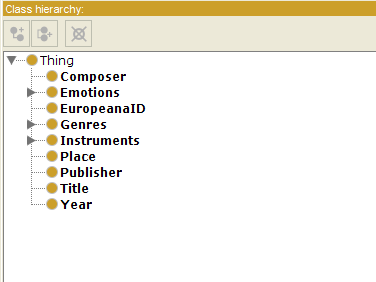

Αν επιλέξετε μια κλάση δεξιά εμφανίζεται η περιγραφή της

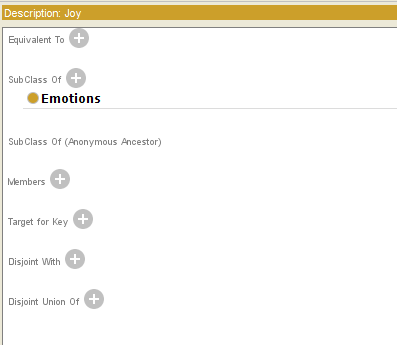

Μπορούμε να ορίσουμε ισοδυναμίες, υπερέννοιες, αξιώματα, άτομα και ξένες έννοιες πατώντας το αντίστοιχο σύμβολο protege-plus.PNG 

##3ο Μέρος: Εμπλουτισμένη Οντολογία και Δεδομένα
Στο τρίτο (3ο) μέρος της άσκησης καλείστε να χρησιμοποιήσετε κάποιο triplestore (προτείνεται το [GraphDB](https://graphdb.ontotext.com/)) στο οποίο θα "φορτώσετε" την εμπλουτισμένη οντολογία που δημιουργήσατε μέσω του Protégé στο δεύτερο (2ο) μέρος καθώς και τα δεδομένα που κρατήσαμε από το πρώτο (1ο) μέρος, να "τρέξετε" το reasoner ο οποίος θα εφαρμόσει στα δεδομένα σας όλους τους κανόνες που έχετε ορίσει μέσω της οντολογίας σας, εμπλουτίζοντας τα δεδομένα με τύπους και ρόλους (θα δείτε αναλύτικά πως λειτουργεί ένας reasoner στο μάθημα), και στη συνέχεια να εκτελέσετε ορισμένα SPARQL ερωτήματα στην ολοκληρωμένη οντολογία σας ώστε να δείξετε τα αποτελέσματα της ορθότητας αλλά και του εμπλουτισμού της οντολογίας σας.
Για παράδειγμα εάν έχετε δημιουργήσει έννοιες RockSong και PopSong οι οποίες είναι υποέννοιες του Song, μερικά SPARQL ερωτήματα που θα μπορούσατε να κάνετε είναι να δείξετε πώς μπορούμε πλέον να φέρουμε όλους τα ροκ κομμάτια απλώς ζητώντας όλους τους individuals που έχουν type RockSong, αντίστοιχα με τα ποπ κομμάτια και την έννοια PopSong, και τέλος να δείξετε πως εάν φέρετε όλα τα κομμάτια τότε έχουμε σαν απάντηση την ένωση των υποσυνόλων που έχετε δημιουργήσει. Καλείστε με αυτό τον τρόπο να παρουσιάσετε τουλάχιστον 4 αντίστοιχα παραδείγματα κατά προτίμηση να μην είναι ίδιου "είδους", δηλαδή να μην είναι όλα απλώς ιεραρχίες. Παρουσιάστε και σχολιάστε στο ακόλουθο markdown τα SPARQL ερωτήματα καθώς και τα αποτελέσματά τους / τι θέλουν να δείξουν.  
<!--Στο τέλος αυτού του μέρους να αποθηκεύσετε την οντολογία από το graphDB σε ένα αρχείο KR-Ex3_3.owl το οποίο θα παραδώσετε στο τέλος.--> 

### Απάντηση 3


### Μικρό tutorial GraphDB

Αφού εγκατασταθεί και τρέξει η free έκδοση του GraphDB, θα ανοίξει ένα παράθυρο στο browser, στη διεύθυνση http://localhost:7200/ . Φτιάχνετε ένα repository, στο ruleset επιλέγετε OWL 2 RL. Πάνω αριστερά πατάτε Import->RDF upload RDF files και ανεβάζετε δύο αρχεία:
- Το ```myonto-graphDB.owl``` που είναι η οντολογία που φτιάξατε στο protegé  
- Το ```KR-Ex2_1.owl``` που είναι ο γράφος γνώσης με διορθώσεις όπως παράχθηκε στο ερώτημα 1.1.3

Στη συνέχεια μπορείτε να πατήσετε αριστερά Explore->Class Hierarchy για να επιβεβαιώσετε πως η οντολογία φορτώθηκε σωστά, και στη συνέχεια με την επιλογή SPARQL αριστερά θα τρέξετε τα ερωτήματα για την επίλυση της άσκησης.  

## Bonus: Μηχανική Μάθηση και Εμπλουτισμός Οντολογίας


Σε αυτό το σημείο θα ασχοληθείτε με την εξαγωγή χαρακτηριστικών από κείμενο. Θα αναλύσετε το συναίσθημα των σχολίων των μουσικών κομματιών της καμπάνιας με τεχνικές Επεξεργασίας Φυσικής Γλώσσας και στη συνέχεια θα εμπλουτίσετε την οντολογίας σας.

Για την ανάλυση των κειμένων θα χρειαστεί να κάνετε προ-επεξεργασία των σχολίων. Για την εξαγωγή του συναισθήματος θα χρησιμοποιήσετε τον προ-εκπαιδευμένο classifier SentimentIntensityAnalyzer που παρέχει η βιβλιοθήκη nltk.

Τα βήματα για την διαδικασία είναι τα παρακάτω:

1. Μελέτη των σχολίων
2. Καθάρισμα των σχολίων από θόρυβο 
3. Καθάρισμα των σχολίων από λέξεις οι όποιες δεν προσφέρουν σημαντική πληροφορία (π.χ. άρθρα, συνδετικές λέξεις κ.ά.)
4. Αναγωγή όλων των λέξεων σε μια βασική μορφή
5. Ανάλυση συναισθήματος των σχολίων

In [ ]:
import pandas as pd
import numpy as np

#διαβάζουμε τα δεδομένα
songs_comments=pd.read_csv('/content/comments.csv')
songs_comments = songs_comments.fillna("")
print(songs_comments.shape)
songs_comments.head(10)

(834, 4)


,user_id,europeana_id,comment,upvotes-downvotes
0,0,446/VIA0212858,Something bad is happening,3
1,1,496/MIL0865312,too noisy,8
2,7,2059210/data_sounds_http___archive_org_downloa...,Stale instrumental banjo song,3
3,8,496/MIL0866000,Made me uncomfortable,3
4,4,446/RAV1929834,feeling lonely,3
5,4,496/MIL0869465,advertisement,2
6,14,446/MIL0865284,introduction of the song,5
7,17,9200369/webclient_DeliveryManager_pid_8408126_...,Disturbing for the ears,4
8,18,2059210/data_sounds_http___archive_org_downloa...,Live show,8
9,21,446/MIL0875998,Melancholic,6


Θα χρησιμοποιήσουμε την βιβλιοθήκη nltk της python η οποία παρέχει έτοιμες συναρτήσεις και πακέτα για την επεξεργασία και την ανάλυση κειμένων. Για την εγκατάσταση της βιβλιοθήκης (αν αυτήν δεν είναι εγκατεστημένη ήδη στο περιβάλλον μας) τρέχουμε την εντολή:


```
python3 -m pip install nltk
```
Η συγκεκριμένη βιβλιοθήκη όπως θα δείτε και παρακάτω περιέχει αρκετά έτοιμα δεδομένα όπως τις συνδετικές λέξεις κάθε γλώσσας κ.ά. Αυτά τα δεδομένα όμως δεν έρχονται μαζί με την εγκατάσταση της βιβλιοθήκης. Για να τα κατεβάσουμε τρέχουμε:

```
import nltk
nltk.download(["stopwords", "vader_lexicon", "wordnet", "punkt"])
```





In [ ]:
import nltk 
import re
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


nltk.download(["stopwords", "vader_lexicon", "wordnet", "punkt"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Τα σχόλια που θέλουμε να αναλύσουμε μπορεί να περιέχουν και πληροφορία την όποια δεν χρειαζόμαστε. Για αυτό πριν την επεξεργασία των σχολίων οι χαρακτήρες αυτοί πρέπει να αφαιρεθούν. 

Για την αφαίρεση των υπόλοιπων χαρακτήρων έχουμε κατασκευάσει εμείς αντίστοιχες συναρτήσεις. 

Για παράδειγμα στο δικό μας Task δεν μας ενδιαφέρει αν τα γράμματα είναι πεζά ή κεφαλαία όποτε επιλέγουμε εμείς να γίνουν όλα πεζά. Επίσης μπορεί να μην μας ενδιαφέρουν οι ειδικοί χαρακτήρες ή οι αριθμοί  όποτε και αυτό μπορούμε αν θέλουμε να το αφαιρέσουμε με την συνάρτηση `remove_special_characters()`.



In [ ]:
def lower_text(text):
    '''
    Συνάρτηση αλλάξει μετατρέπει όλους τους χαρακτηρες σε πεζα
    '''
    return text.lower()

def remove_special_characters(text, remove_digits=True):
    '''
    Συνάρτηση που αφαιρεί ειδικούς χαρακτήρες ή και τα γραμματα αν θέλουμε
    '''
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

Οι παραπάνω συναρτήσεις αφορούσαν το πρώτο στάδιο της προ- επεξεργασίας του κειμένου, το οποίο είναι και το πιο απλό. Στο δεύτερο στάδιο, θα ασχοληθούμε με τα πιο ουσιαστικά βήματα της προ-επεξεργασίας. Αυτά αφορούν την αφαίρεση των λέξεων που δεν περιέχουν ιδιαίτερη πληροφορία όπως οι συνδετικές λέξεις και την κανονικοποιήση των λέξεων σε μια βασική μορφή με την αφαίρεση των καταλήξεων τους.

Για την αφαίρεση των stopwords θα χρησιμοποιήσουμε την βιβλιοθήκη nltk η οποία μας παρέχει μια πλήρη λίστα με όλες αυτές τις λέξεις για διάφορες γλώσσες. Τέλος για την κανονικοποιήση των λέξεων παρέχουμε 2 συναρτήσεις που χρησιμοποιούν την PorterStemmer και WordNetLemmatizer της ίδια βιβλιοθήκης. 

Περισσότερες πληροφορίες για την λειτουργία των μεθόδων αυτών μπορείτε να βρείτε [εδώ](https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_stemming_lemmatization.htm).


In [ ]:
tokenizer=ToktokTokenizer() #για σπάσουμε το κείμενο σε tokens

stopword_list=nltk.corpus.stopwords.words('english') # η λίστα των stopwords

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def stemmer(text):
    words = nltk.word_tokenize(text)
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in words])
    return text

lm = WordNetLemmatizer()
def lemmatizer(text):
    words = nltk.word_tokenize(text)
    text= ' '.join([lm.lemmatize(word) for word in words])
    return text

Όλες οι παραπάνω συναρτήσεις δέχονται σαν είσοδο ένα κείμενο και επιστρέφουν ένα κείμενο. Έτσι με τον τρόπο αυτό μπορούμε να κατασκευάσουμε μια αλυσίδα ενεργειών που θέλουμε να εφαρμόσουμε σε ένα κείμενο. H παρακάτω συνάρτηση δέχεται σαν είσοδο ένα κείμενο και μια λίστα με συναρτήσεις και τις καλεί σειριακά δημιουργώντας ένα pipeline προ-επεξεργασίας του κειμένου.

In [ ]:
pipeline = [lower_text,
            remove_special_characters,
            remove_stopwords,
            stemmer, 
]

In [ ]:
def preprocess_text(text, pipeline):
    '''
    Η συνάρτηση η οποία καλεί όλες τις μεθόδους του pipeline ώστε να γίνει
    η σωστή προεπεξεργασία του κειμένου εισόδου
    '''
    for method in pipeline:
        text = method(text)
    return text

In [ ]:
original_text = songs_comments['comment'][0]
original_text

'Something bad is happening'

In [ ]:
new_text = preprocess_text(original_text, pipeline)
print (new_text)

someth bad happen


Στο παραπάνω παράδειγμα, στην μεταβλητή pipeline αποθηκεύονται με τη σειρά οι συναρτήσεις που θα κληθούν σε κάθε βήμα της προ- επεξεργασίας. Από τα παραπάνω μπορείτε να αλλάξετε τη σειρά των βημάτων, να αφαιρέσετε κάποιο από τα βήματα (εμείς π.χ. δεν έχουμε χρησιμοποιήσει την lemmatizer) ή να προσθέσετε κάποιο δικό σας βήμα (απλά να θυμάστε ότι η συνάρτηση πρέπει αν δέχεται σαν όρισμα αλλά και να επιστρέφει μόνο ένα κείμενο). 

Στο παραπάνω παράδειγμα βλέπουμε ότι π.χ. το something έγινε someth, το is αφαιρέθηκε κ.ο.κ. Έτσι μπορούμε ευκολότερα να ψάξουμε για λέξεις κλειδιά μέσα στα βιογραφικά ώστε να κάνουμε πιο εύκολη τη δουλειά της ομαδοποίησης. 

Για την εξαγωγή του συναισθήματος θα χρησιμοποιήσετε τον προ-εκπαιδευμένο classifier SentimentIntensityAnalyzer που παρέχει η βιβλιοθήκη nltk.


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for comment in songs_comments["comment"]:
  comment = preprocess_text(comment, pipeline)
  print(sia.polarity_scores(comment))

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.631, 'neu': 0.369, 'pos': 0.0, 'compound': -0.1796}
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

Η παραπάνω μέθοδος δέχεται σαν είσοδο ένα κείμενο και επιστρέφει ένα dictionary με τις παρακάτω τιμές:

1. neg: πόσο αρνητικό είναι το κείμενο
2. pos: πόσο θετικό είναι το κείμενο
3. neu: πόσο ουδέτερο είναι το κείμενο
4. compound: αν το κείμενο είναι πολύ θετικό ή αρνητικό. Δηλαδή αν η τιμή αυτή είναι 1 τότε το σχόλιο είναι πολύ θετικό αλλιώς αν είναι -1 πολύ αρνητικό.

Οι 3 πρώτες τιμές αθροίζουν στο 1. 

Με βάση αυτές συλλέγετε τα θετικά και αρνητικά σχόλια των χρηστών. Όπως είναι λογικό, μπορεί κάποια σχόλια να είναι αρκετά ουδέτερα και να μην παρέχουν κάποια πληροφορία. 

In [ ]:
negative, positive = [], []
for comment in songs_comments["comment"]:
    comment =  preprocess_text(comment, pipeline)
    scores = sia.polarity_scores(comment)
    if scores["neg"] > scores["pos"]:
        negative.append(comment)
    else:
        positive.append(comment)

Το παρακάτω κελί κώδικα φτιάχνει ένα wordcloud στο οποίο εμφανίζονται οι λέξεις που εμφανίζονται περισσότερες φορές στα σχόλια. Το μέγεθός τους εξαρτάται από τον ρυθμό εμφάνισής τους για την επίβλεψη της ταξινόμησης. Έτσι μπορείτε να φτιάξετε ένα wordcloud με τις πιο συχνές λέξεις των θετικών και των αρνητικών σχολίων. 

Wordcloud θετικών σχολίων


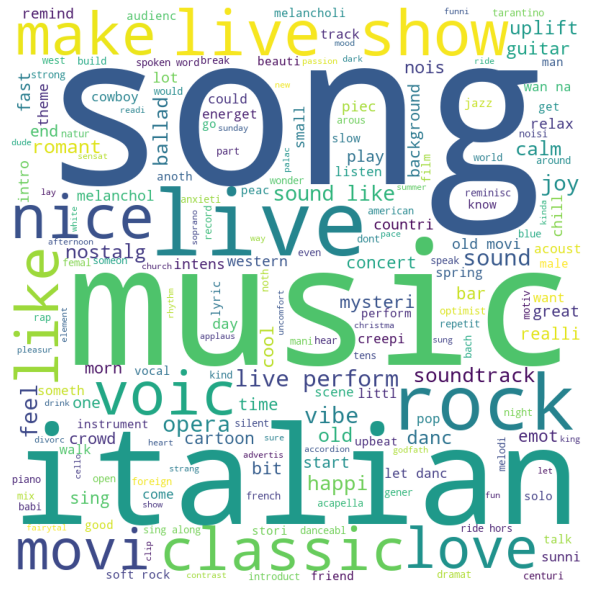

In [ ]:
def draw_word_cloud(list_of_texts, background_color = "white", stopword_list = stopword_list):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color = background_color,
                    stopwords = stopword_list,
                    min_font_size = 10).generate(" ".join(list_of_texts))
    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

print ("Wordcloud θετικών σχολίων")
draw_word_cloud(positive)

Wordcloud αρνητικών σχολίων


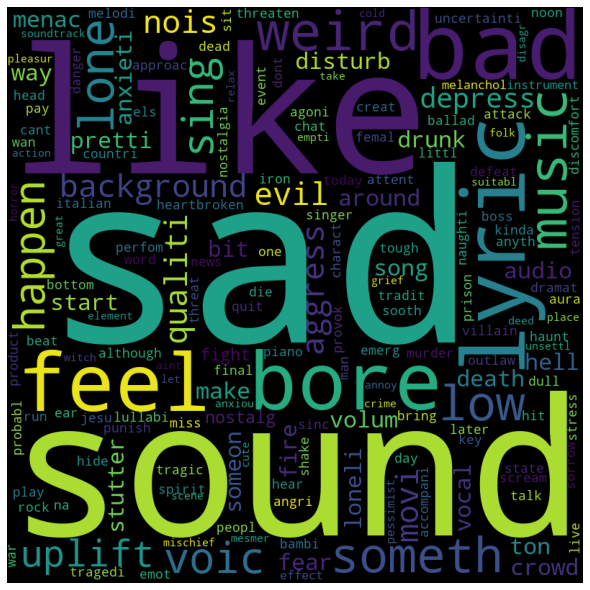

In [ ]:
print ("Wordcloud αρνητικών σχολίων")
draw_word_cloud(negative, "black")

Όπως είναι λογικό σε αυτά περιέχονται μερικές κοινές λέξεις όπως music αλλά για κάθε μια από τις 2 κατηγορίες υπάρχουν χαρακτηριστικές λέξεις όπως like, cool, relax, happi κ.α. για τα θετικά και sad, bore, weird, murder κ.α. για τα αρνητικά.
 

**Ζητούμενα:**  
Καλείστε να αξιοποιήσετε την πληροφορία που εξαγάγατε από τα σχόλια και να εμπλουτίσετε περαιτέρω τον γράφο σας (π.χ. αν ένα μουσικό κομμάτι αρέσει ή όχι). 
Στη συνέχεια καλείστε να εμπλουτίσετε σημασιολογικά την οντολογία σας, με βάση την πληροφορία που προσθέσατε στο γράφο, φτιάχνοντας νέες έννοιες και αξιώματα σημασιολογικά συνεπή. 
Τέλος καλείστε να εκτελέσετε 3 SPARQL ερωτήματα που θα αναδεικνύουν την χρησιμότητα των νέων εννοιών και αξιωμάτων.

In [ ]:
# Απάντηση Bonus

## After exercise suggestions:

### Composers of the exercise:

#### **Nino Rota**
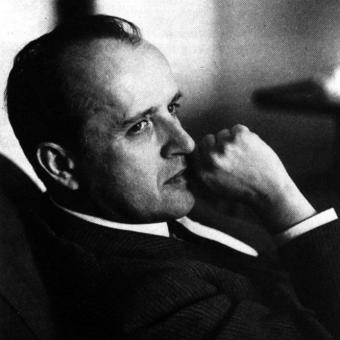

#### **Ennio Morricone**

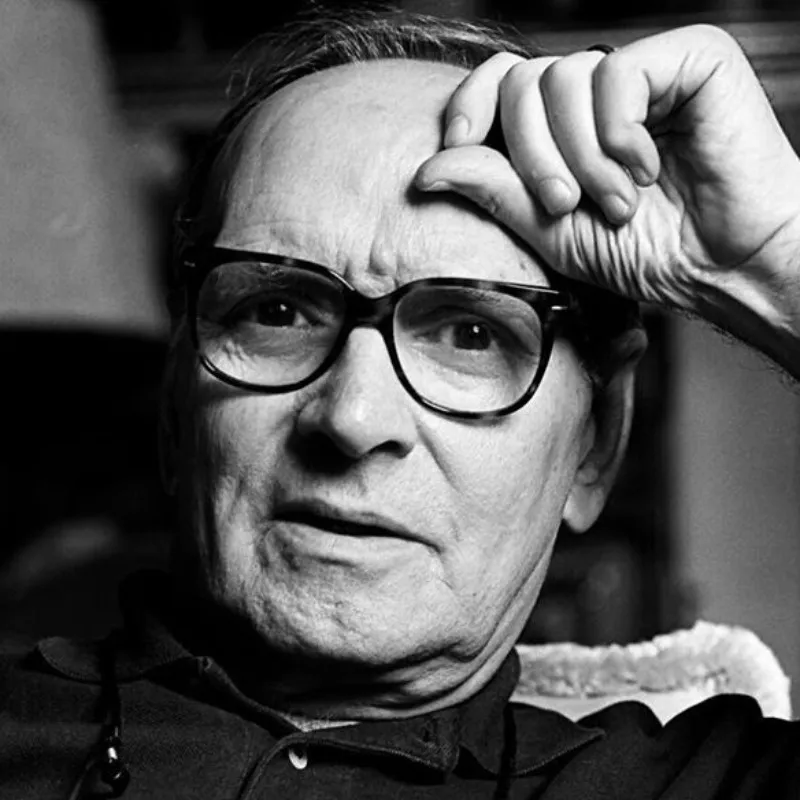

### Any suggestions by you?